In [1]:
import os
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot
from keras import layers
from sklearn.model_selection import StratifiedShuffleSplit
from __future__ import absolute_import, division, print_function
import tensorflow as tf
os.chdir('D:\APDS\Project\Yelp\py workspace')

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df_recommended = pd.read_csv('..\\dataset\\RestaurantData\\recommended.csv')
df_not_recommended = pd.read_csv('..\\dataset\\RestaurantData\\not_recommended.csv')

In [3]:
df_recommended['label'] = 1
df_not_recommended['label'] = 0

In [4]:
frames = [df_recommended, df_not_recommended]
df = pd.concat(frames)

In [5]:
df.head()

,SNo,Review_Id,User_Id,Review_Text,label
0,0,tfR6cUgapL4qa0ayD-MXJQ,YEDnTf7d6RyXKEHDGqi9tg,Toronto hidden gem alert! I am so glad that I ...,1
1,1,b9FySx_x4XeBXzlVU3OC9w,waaZROsfwU7mKcaW8cINtg,We came here in search for a new Italian resta...,1
2,2,ER-O3ogvbFnKq2TUWPxhxQ,6oRhkk76MBoG3ky3AaBMsA,I had the worst service I could ever had in to...,1
3,3,GLj88OeSVnOH48u0lQ7JBw,OucFS92pVsGBwzELoBnWvA,Great experience tucked away in a side street ...,1
4,4,bBYMeN4NZBhkhmrIPBVEBA,KgFOJnWXxVuz0b-xfo6jjw,I was looking for a new Italian restaurant aro...,1


In [6]:
df.isnull().values.any()

False

In [7]:
#StratifiedShuffleSplit so as to split data with evenly distributed classes in each set
def splitData(X, y, testSize):
    #X = np.array(df['text'])
    #y = np.array(df['label'])
    sss = StratifiedShuffleSplit(n_splits=1, test_size=testSize, random_state=0)
    sss.get_n_splits(X, y)
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
    return X_train, y_train, X_test, y_test

In [8]:
##text_to_word_sequence : Converts a text to a sequence of words (or tokens)
df['words'] = [text_to_word_sequence(text) for text in df['Review_Text']]

In [9]:
df.head()

,SNo,Review_Id,User_Id,Review_Text,label,words
0,0,tfR6cUgapL4qa0ayD-MXJQ,YEDnTf7d6RyXKEHDGqi9tg,Toronto hidden gem alert! I am so glad that I ...,1,"[toronto, hidden, gem, alert, i, am, so, glad,..."
1,1,b9FySx_x4XeBXzlVU3OC9w,waaZROsfwU7mKcaW8cINtg,We came here in search for a new Italian resta...,1,"[we, came, here, in, search, for, a, new, ital..."
2,2,ER-O3ogvbFnKq2TUWPxhxQ,6oRhkk76MBoG3ky3AaBMsA,I had the worst service I could ever had in to...,1,"[i, had, the, worst, service, i, could, ever, ..."
3,3,GLj88OeSVnOH48u0lQ7JBw,OucFS92pVsGBwzELoBnWvA,Great experience tucked away in a side street ...,1,"[great, experience, tucked, away, in, a, side,..."
4,4,bBYMeN4NZBhkhmrIPBVEBA,KgFOJnWXxVuz0b-xfo6jjw,I was looking for a new Italian restaurant aro...,1,"[i, was, looking, for, a, new, italian, restau..."


In [60]:
vocab_size = df['words'].map(len).max()
#taking it to vocab_size*1.3 so as to consider lengths from unseen input texts from test data
max_len = round(vocab_size*1.3)
NUM_WORDS = int(max_len)

In [11]:
#One-hot encodes a text into a list of word indexes of size 'max_len'.
df['hashed_text'] = [one_hot(text, NUM_WORDS) for text in df['Review_Text']]

In [12]:
#To convert one_hot encoded values to int, as keras.preprocessing.sequence.pad_sequences is throwing an exception for float values
def toint(x):
    result=[]
    for i in x:
        result.append(int(i))
    return result

In [13]:
df['text'] = df['hashed_text'].map(toint)

In [14]:
df.head()

,SNo,Review_Id,User_Id,Review_Text,label,words,hashed_text,text
0,0,tfR6cUgapL4qa0ayD-MXJQ,YEDnTf7d6RyXKEHDGqi9tg,Toronto hidden gem alert! I am so glad that I ...,1,"[toronto, hidden, gem, alert, i, am, so, glad,...","[957.0, 813.0, 1177.0, 255.0, 1167.0, 765.0, 5...","[957, 813, 1177, 255, 1167, 765, 509, 333, 561..."
1,1,b9FySx_x4XeBXzlVU3OC9w,waaZROsfwU7mKcaW8cINtg,We came here in search for a new Italian resta...,1,"[we, came, here, in, search, for, a, new, ital...","[1061.0, 1059.0, 929.0, 341.0, 1179.0, 1177.0,...","[1061, 1059, 929, 341, 1179, 1177, 337, 1105, ..."
2,2,ER-O3ogvbFnKq2TUWPxhxQ,6oRhkk76MBoG3ky3AaBMsA,I had the worst service I could ever had in to...,1,"[i, had, the, worst, service, i, could, ever, ...","[1167.0, 1023.0, 851.0, 529.0, 521.0, 1167.0, ...","[1167, 1023, 851, 529, 521, 1167, 705, 363, 10..."
3,3,GLj88OeSVnOH48u0lQ7JBw,OucFS92pVsGBwzELoBnWvA,Great experience tucked away in a side street ...,1,"[great, experience, tucked, away, in, a, side,...","[583.0, 469.0, 1099.0, 1015.0, 341.0, 337.0, 1...","[583, 469, 1099, 1015, 341, 337, 173, 1053, 10..."
4,4,bBYMeN4NZBhkhmrIPBVEBA,KgFOJnWXxVuz0b-xfo6jjw,I was looking for a new Italian restaurant aro...,1,"[i, was, looking, for, a, new, italian, restau...","[1167.0, 41.0, 1179.0, 1177.0, 337.0, 1105.0, ...","[1167, 41, 1179, 1177, 337, 1105, 853, 813, 11..."


### Splitting data to create train, validation & test

In [15]:
train_data, train_label, test_data, test_label = splitData(np.array(df['text']), np.array(df['label']), testSize=0.3)
train_data, train_label, val_data, val_label = splitData(train_data, train_label, 0.3)

In [16]:
train_data[0]

[87, 1073, 399, 1003, 925, 197, 393, 851, 727, 587, 345]

In [17]:
#Check length of data. Data length should be same so as to pass it to the network layers.
len(train_data[0]), len(test_data[0]), len(val_data[0])

(11, 156, 57)

In [18]:
max_len

1191.0

### Prepare the data
- The reviews—the arrays of integers—must be converted to tensors before fed into the neural network.
- Pad the arrays so they all have the same length, then create an integer tensor of shape max_length * num_reviews. We can use an embedding layer capable of handling this shape as the first layer in our network.

In [19]:
#pad_sequences : Pads sequences to the same length
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=0,
                                                        padding='post',
                                                        maxlen=NUM_WORDS)

val_data = keras.preprocessing.sequence.pad_sequences(val_data,
                                                        value=0,
                                                        padding='post',
                                                        maxlen=NUM_WORDS)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=0,
                                                       padding='post',
                                                       maxlen=NUM_WORDS)

In [20]:
train_data[0]

array([  87, 1073,  399, ...,    0,    0,    0])

In [21]:
len(train_data[0]), len(test_data[0]), len(val_data[0])

(1191, 1191, 1191)

In [44]:
model = keras.Sequential()

# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(NUM_WORDS, )))
# Hidden - Layers
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 50)                59600     
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
Total params: 62,201
Trainable params: 62,201
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])

In [46]:
history = model.fit(train_data,
                    train_label,
                    epochs=20,
                    batch_size=200,
                    validation_data=(val_data, val_label),
                    verbose=1)

Train on 2165 samples, validate on 928 samples
Epoch 1/20
2165/2165 [==============================] - 1s 350us/step - loss: 4.6645 - acc: 0.7062 - binary_crossentropy: 4.6645 - val_loss: 4.6567 - val_acc: 0.7069 - val_binary_crossentropy: 4.6567
Epoch 2/20
2165/2165 [==============================] - 0s 31us/step - loss: 4.6321 - acc: 0.7090 - binary_crossentropy: 4.6321 - val_loss: 4.6381 - val_acc: 0.7080 - val_binary_crossentropy: 4.6381
Epoch 3/20
2165/2165 [==============================] - 0s 28us/step - loss: 4.6172 - acc: 0.7099 - binary_crossentropy: 4.6172 - val_loss: 4.5464 - val_acc: 0.7112 - val_binary_crossentropy: 4.5464
Epoch 4/20
2165/2165 [==============================] - 0s 31us/step - loss: 4.5723 - acc: 0.7118 - binary_crossentropy: 4.5723 - val_loss: 4.2295 - val_acc: 0.7284 - val_binary_crossentropy: 4.2295
Epoch 5/20
2165/2165 [==============================] - 0s 30us/step - loss: 3.9226 - acc: 0.7455 - binary_crossentropy: 3.9226 - val_loss: 3.9872 - val_acc

In [47]:
print("Validation-Accuracy:", np.mean(history.history["val_acc"]))

Validation-Accuracy: 0.7337823287423315


In [48]:
results = model.evaluate(test_data, test_label)
print(results)

1326/1326 [==============================] - 0s 35us/step
[3.654552174549477, 0.7443438912229121, 3.654552174549477]


In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'val_binary_crossentropy', 'loss', 'acc', 'binary_crossentropy'])

#### Graphs of loss and accuracy over time

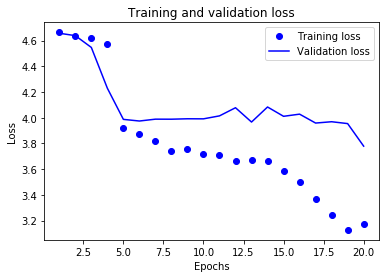

In [50]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

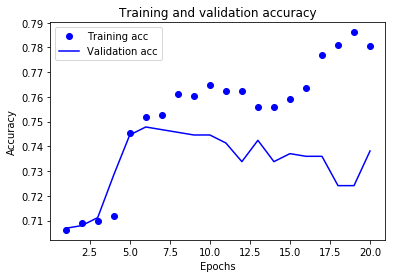

In [51]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- Clearly visible in the graphs above that training can be stopped after 5-6 epochs, as it is overfitting the data after that
- Validation loss seems to be at its peak at 5-6 epochs while training loss is decreasing continuously, thus overfitting the training data

In [52]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

- To prevent overfitting:
    - Used droupout model
    - Reduce the capacity of the model

In [56]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_label,
                                  epochs=20,
                                  batch_size=200,
                                  validation_data=(val_data, val_label),
                                  verbose=2)

Train on 2165 samples, validate on 928 samples
Epoch 1/20
 - 1s - loss: 7.1110 - acc: 0.5224 - binary_crossentropy: 7.1110 - val_loss: 4.6366 - val_acc: 0.6552 - val_binary_crossentropy: 4.6366
Epoch 2/20
 - 0s - loss: 6.0882 - acc: 0.5945 - binary_crossentropy: 6.0882 - val_loss: 3.9787 - val_acc: 0.7198 - val_binary_crossentropy: 3.9787
Epoch 3/20
 - 0s - loss: 5.7079 - acc: 0.6115 - binary_crossentropy: 5.7079 - val_loss: 3.9283 - val_acc: 0.7198 - val_binary_crossentropy: 3.9283
Epoch 4/20
 - 0s - loss: 5.2713 - acc: 0.6356 - binary_crossentropy: 5.2713 - val_loss: 3.9964 - val_acc: 0.7241 - val_binary_crossentropy: 3.9964
Epoch 5/20
 - 0s - loss: 4.7945 - acc: 0.6637 - binary_crossentropy: 4.7945 - val_loss: 3.9096 - val_acc: 0.7209 - val_binary_crossentropy: 3.9096
Epoch 6/20
 - 0s - loss: 4.3842 - acc: 0.6841 - binary_crossentropy: 4.3842 - val_loss: 3.8859 - val_acc: 0.7252 - val_binary_crossentropy: 3.8859
Epoch 7/20
 - 0s - loss: 4.7207 - acc: 0.6517 - binary_crossentropy: 4.

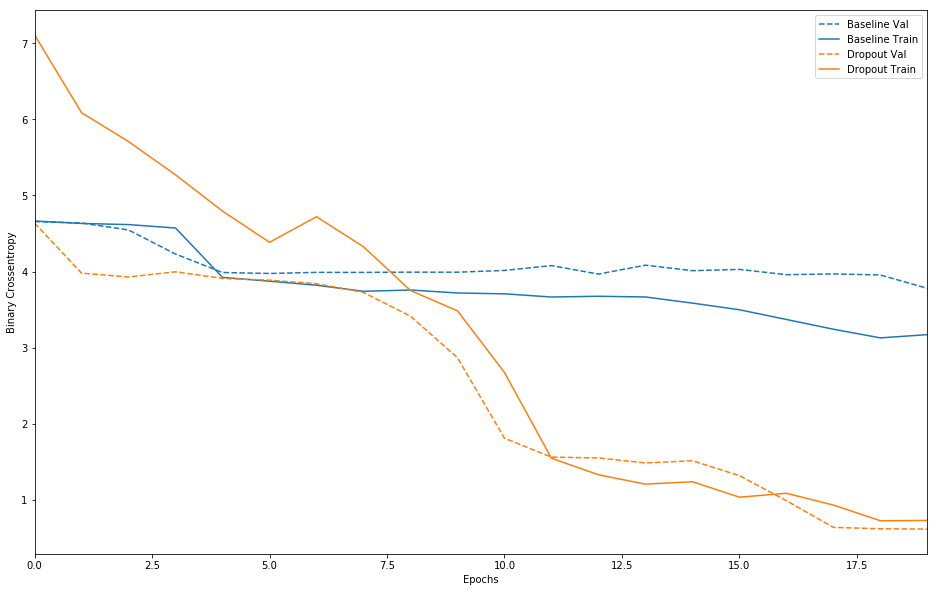

In [57]:
plot_history([('baseline', history),
              ('dropout', dpt_model_history)])

Adding dropout is a clear improvement over the baseline model.

In [58]:
results = dpt_model.evaluate(test_data, test_label)
print(results)

1326/1326 [==============================] - 0s 30us/step
[0.7674384068579695, 0.7217194568337718, 0.7674384068579695]


### Trying multi hot encoding to the input

In [59]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

In [61]:
train_data = multi_hot_sequences(train_data, NUM_WORDS)

val_data = multi_hot_sequences(val_data, NUM_WORDS)

test_data = multi_hot_sequences(test_data, NUM_WORDS)

In [62]:
model = keras.Sequential()
model.add(layers.Dense(50, activation = "relu", input_shape=(NUM_WORDS, )))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])

history = model.fit(train_data,
                    train_label,
                    epochs=20,
                    batch_size=200,
                    validation_data=(val_data, val_label),
                    verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 50)                59600     
_________________________________________________________________
dense_33 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 51        
Total params: 62,201
Trainable params: 62,201
Non-trainable params: 0
_________________________________________________________________
Train on 2165 samples, validate on 928 samples
Epoch 1/20
 - 1s - loss: 0.5862 - acc: 0.6993 - binary_crossentropy: 0.5862 - val_loss: 0.5590 - val_acc: 0.7069 - val_binary_crossentropy: 0.5590
Epoch 2/20
 - 0s - loss: 0.5421 - acc: 0.7072 - binary_crossentropy: 0.5421 - val_loss: 0.5482 - val_acc: 0.7069 - val_binary_crossentropy: 0.5482
Epoch 3/20
 - 0s - loss: 0.5219 - acc: 0.7072 - binary_crosse

In [63]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_label,
                                  epochs=20,
                                  batch_size=200,
                                  validation_data=(val_data, val_label),
                                  verbose=2)

Train on 2165 samples, validate on 928 samples
Epoch 1/20
 - 1s - loss: 0.7131 - acc: 0.4993 - binary_crossentropy: 0.7131 - val_loss: 0.6386 - val_acc: 0.7069 - val_binary_crossentropy: 0.6386
Epoch 2/20
 - 0s - loss: 0.6474 - acc: 0.6199 - binary_crossentropy: 0.6474 - val_loss: 0.5772 - val_acc: 0.7069 - val_binary_crossentropy: 0.5772
Epoch 3/20
 - 0s - loss: 0.6150 - acc: 0.6605 - binary_crossentropy: 0.6150 - val_loss: 0.5564 - val_acc: 0.7069 - val_binary_crossentropy: 0.5564
Epoch 4/20
 - 0s - loss: 0.6087 - acc: 0.6808 - binary_crossentropy: 0.6087 - val_loss: 0.5573 - val_acc: 0.7069 - val_binary_crossentropy: 0.5573
Epoch 5/20
 - 0s - loss: 0.6011 - acc: 0.6758 - binary_crossentropy: 0.6011 - val_loss: 0.5579 - val_acc: 0.7069 - val_binary_crossentropy: 0.5579
Epoch 6/20
 - 0s - loss: 0.5808 - acc: 0.6891 - binary_crossentropy: 0.5808 - val_loss: 0.5523 - val_acc: 0.7069 - val_binary_crossentropy: 0.5523
Epoch 7/20
 - 0s - loss: 0.5766 - acc: 0.6947 - binary_crossentropy: 0.

In [64]:
results = model.evaluate(test_data, test_label)
print(results)

1326/1326 [==============================] - 0s 45us/step
[0.9235312898234544, 0.7187028659414921, 0.9235312898234544]


In [65]:
results = dpt_model.evaluate(test_data, test_label)
print(results)

1326/1326 [==============================] - 0s 35us/step
[0.5236959412896256, 0.7511312218093584, 0.5236959412896256]


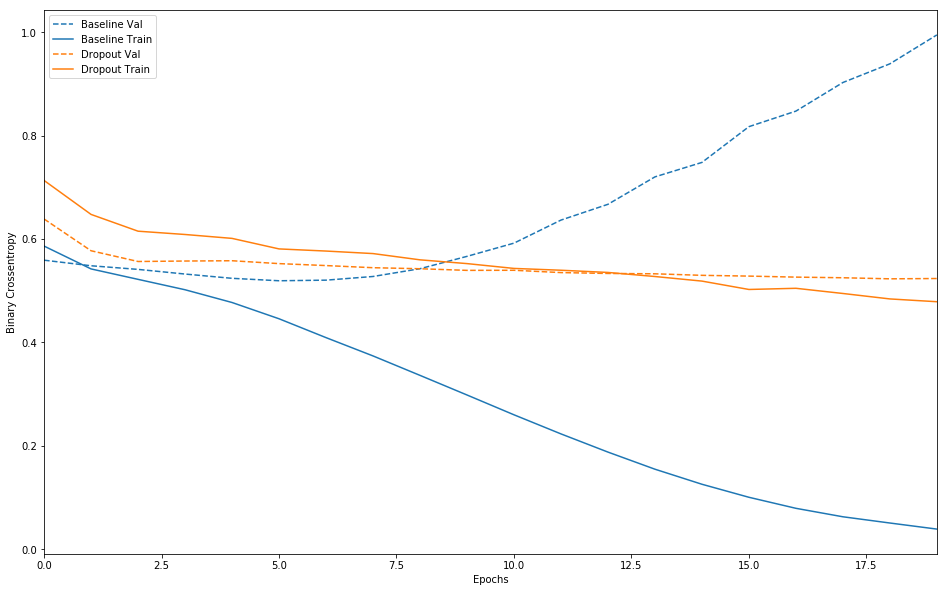

In [66]:
plot_history([('baseline', history),
              ('dropout', dpt_model_history)])